# Prepping Data Week 1

Input Data

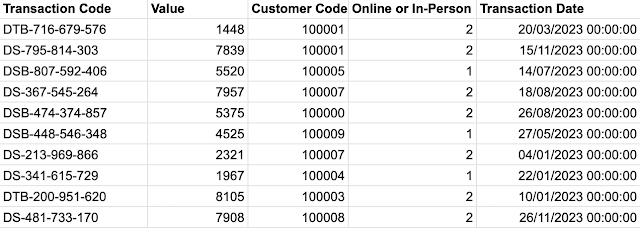

Requirements

1. Input the data (help)
2. Split the Transaction Code to extract the letters at the start of the transaction code. These identify the bank who processes the transaction (help)
3. Rename the new field with the Bank code 'Bank'. 
4. Rename the values in the Online or In-person field, Online of the 1 values and In-Person for the 2 values. 
5. Change the date to be the day of the week (help)
6. Different levels of detail are required in the outputs. You will need to sum up the values of the transactions in three ways (help):
- Total Values of Transactions by each bank
- Total Values by Bank, Day of the Week and Type of Transaction (Online or In-Person)
- Total Values by Bank and Customer Code
Output each data file (help)
Output
Output 1: Total Values of Transactions by each bank



In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
# Read in csv file
df = pd.read_csv("PD 2023 Wk 1 Input.csv")
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction Code     365 non-null    object
 1   Value                365 non-null    int64 
 2   Customer Code        365 non-null    int64 
 3   Online or In-Person  365 non-null    int64 
 4   Transaction Date     365 non-null    object
dtypes: int64(3), object(2)
memory usage: 14.4+ KB


In [4]:
# 2. Split the Transaction Code to extract the letters at the start of the transaction code. 
# These identify the bank who processes the transaction (help)
# 3. Rename the new field with the Bank code 'Bank'. 
# Soln: Use list comprehension
df['Bank'] =[x.split('-')[0] for x in df['Transaction Code']]

In [5]:
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00,DTB
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00,DS
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00,DSB
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00,DS
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00,DSB


In [6]:
#4. Rename the values in the Online or In-person field, 
# 1 as 'Online', 2 as 'In-Person'
# Solution: use replace method with dictionary
df['Online or In-Person'].replace({1: 'Online', 2:'In-Person'}, inplace=True)

In [7]:
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank
0,DTB-716-679-576,1448,100001,In-Person,20/03/2023 00:00:00,DTB
1,DS-795-814-303,7839,100001,In-Person,15/11/2023 00:00:00,DS
2,DSB-807-592-406,5520,100005,Online,14/07/2023 00:00:00,DSB
3,DS-367-545-264,7957,100007,In-Person,18/08/2023 00:00:00,DS
4,DSB-474-374-857,5375,100000,In-Person,26/08/2023 00:00:00,DSB


In [29]:
# 5. Change the date to be the day of the week (help)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction Code     365 non-null    object
 1   Value                365 non-null    int64 
 2   Customer Code        365 non-null    int64 
 3   Online or In-Person  365 non-null    object
 4   Transaction Date     365 non-null    object
 5   Bank                 365 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.2+ KB


In [8]:
# Parse 'Transaction Date' as datetime column
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [35]:
# Confirm that data type for date column has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction Code     365 non-null    object        
 1   Value                365 non-null    int64         
 2   Customer Code        365 non-null    int64         
 3   Online or In-Person  365 non-null    object        
 4   Transaction Date     365 non-null    datetime64[ns]
 5   Bank                 365 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 17.2+ KB


In [9]:
import datetime as dt

In [23]:
df['Day of Week'] = df['Transaction Date'].dt.strftime('%A')

In [24]:
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank,Day of Week
0,DTB-716-679-576,1448,100001,In-Person,2023-03-20,DTB,Monday
1,DS-795-814-303,7839,100001,In-Person,2023-11-15,DS,Wednesday
2,DSB-807-592-406,5520,100005,Online,2023-07-14,DSB,Friday
3,DS-367-545-264,7957,100007,In-Person,2023-08-18,DS,Friday
4,DSB-474-374-857,5375,100000,In-Person,2023-08-26,DSB,Saturday


In [43]:
#6 Different levels of detail are required in the outputs. You will need to sum up the values of the transactions in three ways (help):


In [36]:
#6.1 Total Values of Transactions by each bank
results1 = df.groupby(['Bank'])['Value'].sum().sort_values(ascending=False).reset_index()

print(results1)

  Bank   Value
0   DS  653940
1  DTB  618238
2  DSB  530489


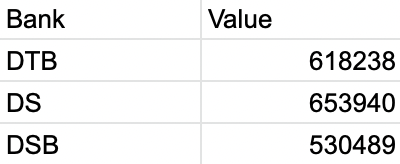

In [32]:
#6.2 Total Values by Bank, Day of the Week and Type of Transaction (Online or In-Person)

results2 = df.groupby(['Bank', 'Day of Week', 'Online or In-Person'])['Value'].sum().reset_index()

In [33]:
print(results2)

   Bank Day of Week Online or In-Person  Value
0    DS      Friday           In-Person  50925
1    DS      Friday              Online  61713
2    DS      Monday           In-Person  50810
3    DS      Monday              Online  34668
4    DS    Saturday           In-Person  41141
5    DS    Saturday              Online  64362
6    DS      Sunday           In-Person  70291
7    DS      Sunday              Online  40022
8    DS    Thursday           In-Person  39805
9    DS    Thursday              Online  11448
10   DS     Tuesday           In-Person  42519
11   DS     Tuesday              Online  41709
12   DS   Wednesday           In-Person  63957
13   DS   Wednesday              Online  40570
14  DSB      Friday           In-Person  31640
15  DSB      Friday              Online  30308
16  DSB      Monday           In-Person  39507
17  DSB      Monday              Online  37895
18  DSB    Saturday           In-Person  72116
19  DSB    Saturday              Online  39699
20  DSB      

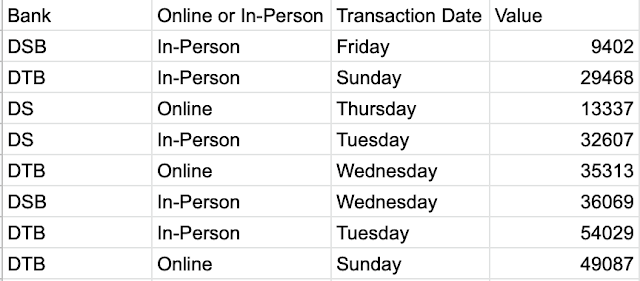

Four data fields:
- Bank
- Online or In-Person
- Transaction Date

Value:
- 42 rows of data (43 including field headers)

In [37]:
#6.3 Total Values by Bank and Customer Code

In [39]:
results3 = df.groupby(['Bank', 'Customer Code'])['Value'].sum().reset_index()

results3

,Bank,Customer Code,Value
0,DS,100000,57909
1,DS,100001,53063
2,DS,100002,69803
3,DS,100003,25482
4,DS,100004,63315
5,DS,100005,39668
6,DS,100006,77636
7,DS,100007,76190
8,DS,100008,56400
9,DS,100009,56581


Expected Output

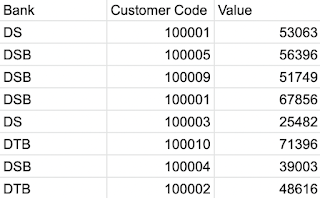

Three data fields:
Bank
Customer Code
Value
33 rows of data (34 including field headers)